In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
# load datasets
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [3]:
# split the dataset into training and testing sets
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
# build a simple feedforward neural network using keras
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(units= 1, activation='sigmoid'))

In [6]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# train the model
history = model.fit(x_train,y_train ,epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 20ms/step - loss: 0.8733 - accuracy: 0.4939 - val_loss: 0.7209 - val_accuracy: 0.5652
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6724 - val_loss: 0.5561 - val_accuracy: 0.7391
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.8044 - val_loss: 0.4424 - val_accuracy: 0.8261
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3893 - accuracy: 0.8704 - val_loss: 0.3667 - val_accuracy: 0.9130
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3266 - accuracy: 0.9120 - val_loss: 0.3161 - val_accuracy: 0.9130
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.9242 - val_loss: 0.2791 - val_accuracy: 0.9130
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2526 - accuracy: 0.9291 - val_loss: 0.2529 - val_accuracy: 0.9130
Epoch 8/50
13/13 [=

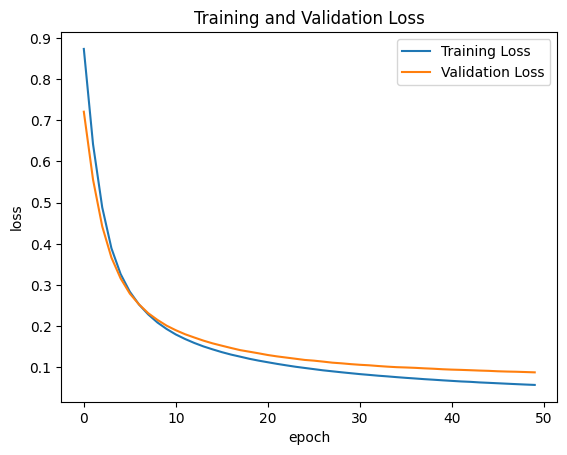

In [8]:
# plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
#make prediction on the test set
pred_probs = model.predict(x_test)
pred_labels = (pred_probs >0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [10]:
# calculate accuracy
accuracy = accuracy_score(y_test, pred_labels)
print(format(accuracy*100))

96.49122807017544
